<a href="https://colab.research.google.com/github/gandalfmuda/Data-Scientis-mastery/blob/main/AI%20Disain%20Grafis%20Penggabung%202%20Gambar/Seni_Grafis_Penggabungan_2_Gambar_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro**

Tensorflow adalah library pthon yang banyak di gunakan untuk machine learning pemrosesan algoritma grafis. Disini saya akan memcoba menggabungkan 2 gambar berbeda jenis menjadi sebuah art atau seni grafis.

In [1]:
import tensorflow as tf

In [2]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

# Fungsi Style Gambar Menjadi Tensor

In [3]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)

    # Resize the image to specific dimensions
    img = tf.image.resize(img, [512, 512])
    img = img[tf.newaxis, :]
    return img

# Masukkan 2 gambar yang berbeda, 1 gambar objek/foto real dan ke 2 gambar lukisan / paint art

In [7]:
real_tensor = image_to_tensor('/content/monas.jpg')
style_tensor = image_to_tensor('/content/paint.jpg')

mulai style transfer

In [8]:
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools

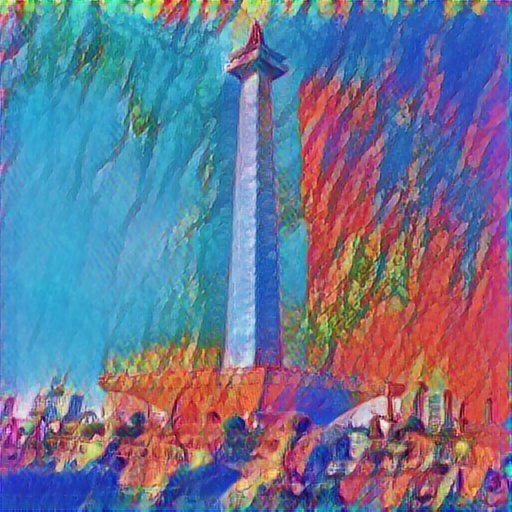

In [9]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(real_tensor), tf.constant(style_tensor))[0]
tensor_to_image(stylized_image)